In [1]:
import nussl
import matplotlib.pyplot as plt
import time

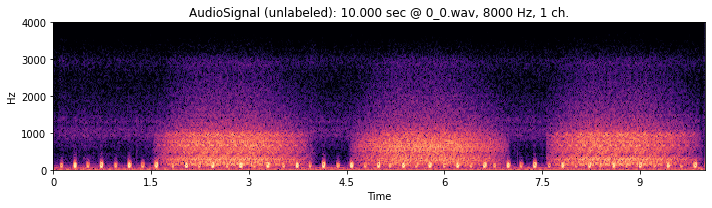

In [2]:
start_time = time.time()


history = nussl.AudioSignal('0_0.wav')
history.embed_audio()

plt.figure(figsize=(10, 3))
nussl.utils.visualize_spectrogram(history)
plt.title(str(history))
plt.tight_layout()
plt.show()

In [6]:
repet = nussl.separation.primitive.Repet(history)

In [4]:
import torch

In [5]:
torch.cuda.is_available()

True

In [7]:

repet_exact_period = nussl.separation.primitive.Repet(
    history, period=3.5)  # exact period
repet_period_guess = nussl.separation.primitive.Repet(
    history, min_period=3.4, max_period=3.6)  # guess the period

In [8]:

repet = nussl.separation.primitive.Repet(history)

In [9]:
masks = repet.run()
print(masks)

[<nussl.core.masks.soft_mask.SoftMask object at 0x000002B6FB345DC0>, <nussl.core.masks.soft_mask.SoftMask object at 0x000002B6FB28FFD0>]


In [10]:
masks = repet.run()
estimates = repet.make_audio_signals()

In [11]:
estimates = repet() # does run then make_audio_signals

In [12]:
repet.repeating_period

105

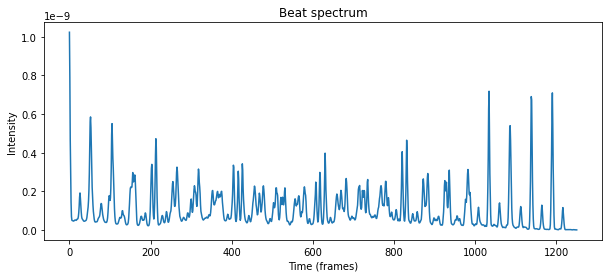

In [13]:
plt.figure(figsize=(10, 4))
plt.plot(repet.beat_spectrum)
plt.xlabel('Time (frames)')
plt.ylabel('Intensity')
plt.title('Beat spectrum')
plt.show()

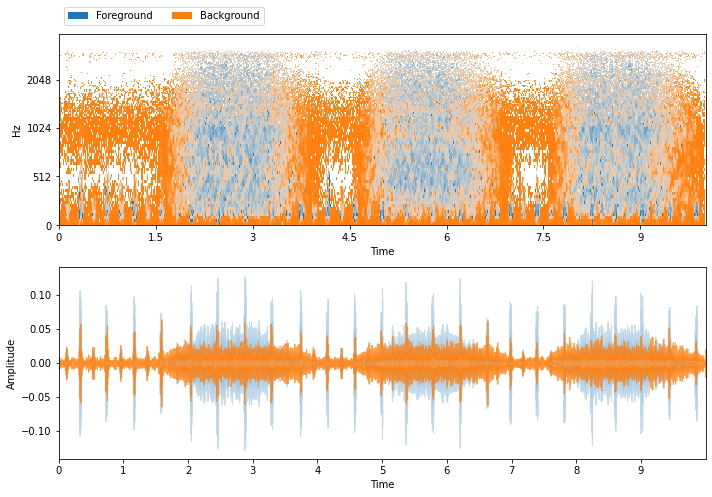


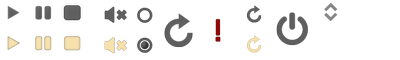
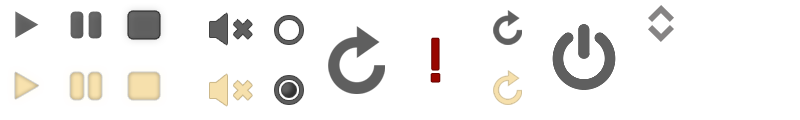
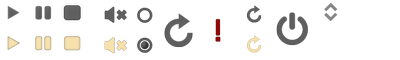

In [14]:

_estimates = {
    'Background': estimates[0],
    'Foreground': estimates[1]
} # organize estimates into a dict

plt.figure(figsize=(10, 7))
plt.subplot(211)
nussl.utils.visualize_sources_as_masks(
    _estimates, db_cutoff=-60, y_axis='mel')
plt.subplot(212)
nussl.utils.visualize_sources_as_waveform(
    _estimates, show_legend=False)
plt.tight_layout()
plt.show()

nussl.play_utils.multitrack(_estimates)